# Revisões de Python e grafos

<div style="color:#0000FF"> Um grafo *orientado* e *não pesado* é um par $(V,E)$ onde $V$ é um conjunto finito de vértices e $E$ uma relação binária em $V$, o conjunto de *arcos* ou *arestas* do grafo. </div>

Um grafo *não pesado* pode ser representado usando *listas de adjacências*. Em Python é
possível implementar as ditas usando um dicionário de listas, onde a cada vértice temos associada a sua lista
de adjacentes (vértices directamente ligados através de uma aresta).

Se o grafo for também *não orientado* bastará desdobrar cada aresta em duas adjacências.

Por exemplo, o grafo

<img src="exemplo.png" width=400/>

pode ser armazenado no dicionário `graph` da seguinte forma.

In [1]:
graph = {'OPO': ['LIS', 'FAO', 'MAD', 'FRA'],
         'LIS': ['OPO', 'FAO', 'LON', 'NRT', 'FRA'],
         'FAO': ['OPO', 'LIS'],
         'MAD': ['OPO'],
         'LON': ['LIS', 'NRT', 'FRA'],
         'FRA': ['OPO', 'LON', 'LIS'],
         'NRT': ['LIS', 'LON']}

In [2]:
len(graph) 

7

### Exercício 1
Defina uma função `count_edges` que conta o número de arestas de um grafo representado desta forma.

In [3]:
def count_edges(g):
    k = set()
    
    for x in g:
        for z in g[x]:
            k.add((x,z))       
            k.add((z,x))
    return int(len(k)/2)
            
def count_edges2(g):
    return sum(map(lambda t : len(graph[t]), graph)) //2

print(count_edges(graph))
print(count_edges2(graph))

10
10


Um grafo não orientado pode ser armazenado num ficheiro num formato de texto escrevendo um arco por linha da seguinte forma (conforme conteúdo do ficheiro `exemplo.txt`).

```
OPO LIS
OPO FAO
LIS FAO
MAD OPO
LIS LON
FRA OPO
LIS NRT
LON NRT
LON FRA
LIS FRA
```

Para criar um grafo a partir de um ficheiro armazenado neste formato podemos usar a seguinte função.

In [4]:
def parse(name):
    file = open(name)
    adj = {}
    for l in file:
        o,d = l.split()
        if o not in adj:
            adj[o] = []
        if d not in adj:
            adj[d] = []
        adj[o].append(d)
        adj[d].append(o)
    return(adj)

parse("exemplo.txt")

{'OPO': ['LIS', 'FAO', 'MAD', 'FRA'],
 'LIS': ['OPO', 'FAO', 'LON', 'NRT', 'FRA'],
 'FAO': ['OPO', 'LIS'],
 'MAD': ['OPO'],
 'LON': ['LIS', 'NRT', 'FRA'],
 'FRA': ['OPO', 'LON', 'LIS'],
 'NRT': ['LIS', 'LON']}

Existem muitos algoritmos para analisar grafos. Um exemplo, é o seguinte algoritmo que calcula a *distância* entre
cada par de vértices de um grafo *não pesado*. A distância entre dois vértices é o comprimento do caminho mais curto
entre eles. A função `all_pairs_shortest_paths` devolve todas as distâncias usando um dicionário de dicionários de 
distâncias (no fundo uma matriz de distâncias).

In [5]:
def all_pairs_shortest_paths(adj):
    dist = {}
    for o in adj:
        dist[o] = {}
        for d in adj:
            if o == d:
                dist[o][d] = 0
            else:
                dist[o][d] = float("inf")
        for d in adj[o]:
                dist[o][d] = 1
    for k in adj:
        for o in adj:
            for d in adj:
                if dist[o][d] > dist[o][k] + dist[k][d]:
                    dist[o][d] = dist[o][k] + dist[k][d]
    return dist

all_pairs_shortest_paths(parse("exemplo.txt"))

{'OPO': {'OPO': 0, 'LIS': 1, 'FAO': 1, 'MAD': 1, 'LON': 2, 'FRA': 1, 'NRT': 2},
 'LIS': {'OPO': 1, 'LIS': 0, 'FAO': 1, 'MAD': 2, 'LON': 1, 'FRA': 1, 'NRT': 1},
 'FAO': {'OPO': 1, 'LIS': 1, 'FAO': 0, 'MAD': 2, 'LON': 2, 'FRA': 2, 'NRT': 2},
 'MAD': {'OPO': 1, 'LIS': 2, 'FAO': 2, 'MAD': 0, 'LON': 3, 'FRA': 2, 'NRT': 3},
 'LON': {'OPO': 2, 'LIS': 1, 'FAO': 2, 'MAD': 3, 'LON': 0, 'FRA': 1, 'NRT': 1},
 'FRA': {'OPO': 1, 'LIS': 1, 'FAO': 2, 'MAD': 2, 'LON': 1, 'FRA': 0, 'NRT': 2},
 'NRT': {'OPO': 2, 'LIS': 1, 'FAO': 2, 'MAD': 3, 'LON': 1, 'FRA': 2, 'NRT': 0}}

### Exercício 2
O *diâmetro* de um grafo é a distância entre os seus vértices mais afastados. Defina a função `diameter` que calcula o
diâmetro de um grafo, tirando proveito da função `all_pairs_shortest_paths`.

In [6]:
# def diameter(adj):
#     # completar
#     dist = all_pairs_shortest_paths(adj);
#     m = 0
#     for cidade in dist:
#         m = max(m,max(dist[cidade].values()))
            
            
#     return m
        
def diameter(adj):
    dist = all_pairs_shortest_paths(adj); 
    m = 0
    for x in dist:
        for y in dist[x]:
            m = max(m,dist[x][y])
    return m
            
    
diameter(parse("exemplo.txt"))

3

## Biblioteca `NetworkX` para manipulação de grafos.

A biblioteca `NetworkX` diponibiliza implementações de vários tipos de grafos e de muitos algoritmos para os analisar e visualizar. Para importar esta biblioteca de forma qualificada faz-se o seguinte.

In [7]:
import networkx as nx

O tutorial desta biblioteca pode ser encontrado em https://networkx.github.io/documentation/stable/tutorial.html.

### Exercício 3
Reimplemente a função `parse` passando a usar a implementação de grafos desta biblioteca em vez dos dicionários do python.

In [8]:


def parse(name):
    # completar
    
    file = open(name)
    g = nx.Graph()
    
    for l in file:
        o,d = l.split()
        g.add_edge(o, d)
    
    return g

def parse2(name):
    return nx.read_edgelist(name)
    
    


graph = parse2("exemplo.txt")
nx.to_dict_of_lists(graph) # converte o grafo para um dicionário de listas

{'OPO': ['LIS', 'FAO', 'MAD', 'FRA'],
 'LIS': ['OPO', 'FAO', 'LON', 'NRT', 'FRA'],
 'FAO': ['OPO', 'LIS'],
 'MAD': ['OPO'],
 'LON': ['LIS', 'NRT', 'FRA'],
 'FRA': ['OPO', 'LON', 'LIS'],
 'NRT': ['LIS', 'LON']}

### Exercício 4
Implemente outra versão da função `parse` usando directamente as funções disponibilizadas pelo `NetworkX` para leitura
e escrita em ficheiro, conforme https://networkx.github.io/documentation/stable/reference/readwrite/index.html.

In [9]:
def parse(name):
    # completar 
        
graph = parse("exemplo.txt")
nx.to_dict_of_lists(graph)

IndentationError: expected an indented block (<ipython-input-9-9f003f4598de>, line 4)

Como referido acima, a vantagem de usar a biblioteca `NetworkX` é que os algoritmos de análise mais usais estão todos já implementados. Por exemplo, para calcular o diâmetro do grafo exemplo basta fazer o seguinte.

In [ ]:
nx.diameter(parse("exemplo.txt"))

### Exercício 5
Utilize a bibliotecas `NetworkX` e `Matplotlib` para desenhar o grafo exemplo, conforme explicado em https://networkx.github.io/documentation/stable/tutorial.html#drawing-graphs.

In [ ]:
# completar
#colocar parecido
nx.draw(graph, pos=nx.planar_layout(graph), with_labels = True, node_size = 1000)

### Exercício 6
A biblioteca `NetworkX` disponibiliza também vários geradores de grafos pré-definidos, coforme documentação em https://networkx.github.io/documentation/stable/reference/generators.html.
    Use esses geradores para criar um grafo degenerado que é um ciclo com 100 vértices. 
    Desenhe esse grafo e calcule o seu diâmetro 
    (que deverá ser 50).

250
{0: [1, 499], 1: [0, 2], 2: [1, 3], 3: [2, 4], 4: [3, 5], 5: [4, 6], 6: [5, 7], 7: [6, 8], 8: [7, 9], 9: [8, 10], 10: [9, 11], 11: [10, 12], 12: [11, 13], 13: [12, 14], 14: [13, 15], 15: [14, 16], 16: [15, 17], 17: [16, 18], 18: [17, 19], 19: [18, 20], 20: [19, 21], 21: [20, 22], 22: [21, 23], 23: [22, 24], 24: [23, 25], 25: [24, 26], 26: [25, 27], 27: [26, 28], 28: [27, 29], 29: [28, 30], 30: [29, 31], 31: [30, 32], 32: [31, 33], 33: [32, 34], 34: [33, 35], 35: [34, 36], 36: [35, 37], 37: [36, 38], 38: [37, 39], 39: [38, 40], 40: [39, 41], 41: [40, 42], 42: [41, 43], 43: [42, 44], 44: [43, 45], 45: [44, 46], 46: [45, 47], 47: [46, 48], 48: [47, 49], 49: [48, 50], 50: [49, 51], 51: [50, 52], 52: [51, 53], 53: [52, 54], 54: [53, 55], 55: [54, 56], 56: [55, 57], 57: [56, 58], 58: [57, 59], 59: [58, 60], 60: [59, 61], 61: [60, 62], 62: [61, 63], 63: [62, 64], 64: [63, 65], 65: [64, 66], 66: [65, 67], 67: [66, 68], 68: [67, 69], 69: [68, 70], 70: [69, 71], 71: [70, 72], 72: [71, 73], 7

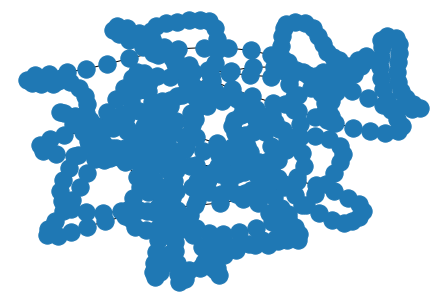

In [13]:
# completar
import z3

G = nx.cycle_graph(100)
nx.draw(G)
print(diameter(nx.to_dict_of_lists(G) ))

print(nx.to_dict_of_lists(G))
